In [130]:
# Standard stack
import datetime
import pandas as pd
import numpy as np
import re

# Visualization
from pandas_profiling import ProfileReport
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import tensorflow as tf
import tensorflow_decision_forests as tfdf
try:
    from wurlitzer import sys_pipes
except:
    from colabtools.googlelog import CaptureLog as sys_pipes

# Scikit-learn packages
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# display
from IPython.core.magic import register_line_magic
from IPython.display import Javascript

# Constants

In [131]:
TRAIN_PATH = "../../sliced_s01e04/data/train.csv"
TEST_PATH = "../../sliced_s01e04/data/test.csv"
label = "rain_tomorrow"

# Load Data

In [132]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(TEST_PATH)

In [133]:
#train.head(1)

In [134]:
#train.info()

# Preprocess

### Drop Columns

In [135]:
to_drop = ['id','date','location','evaporation','sunshine']

In [136]:
train = train.drop(to_drop,axis=1)
test = test.drop(to_drop,axis=1)

### Missing Values

In [137]:
def inpute_missing(dataset):
    """ 
    Edit this to fix nulls. Default version replaces all int/float with 0
    """
    for col in dataset.columns:
        if dataset[col].dtype not in [str, object]:
            dataset[col] = dataset[col].fillna(0)

train = inpute_missing(train)
test = inpute_missing(test)

### NLP

In [138]:
def nlp_transforms(dataset):
    """ 
    NLP tranforms here. Default, None...
    """
    return dataset

train = nlp_transforms(train)
test = nlp_transforms(test)

### Computations

In [139]:
def nlp_transforms(dataset):
    """ 
    NLP tranforms here. Default, None...
    """
    return dataset

train = nlp_transforms(train)
test = nlp_transforms(test)

# Split & Train

In [140]:
X_train, X_test = train_test_split(train)

train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=label)
test_tf = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=label)
predictions = tfdf.keras.pd_dataframe_to_tf_dataset(test)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [141]:
## Models

In [125]:
# A more complex, but possibly, more accurate model.
models = {
    'rf_baselines': tfdf.keras.RandomForestModel(),
    'gbt_baseline': tfdf.keras.GradientBoostedTreesModel(),
    'gbt_tunes_1': tfdf.keras.GradientBoostedTreesModel(
                    num_trees=500,
                    growing_strategy="BEST_FIRST_GLOBAL",
                    max_depth=8,
                    split_axis="SPARSE_OBLIQUE",
                    categorical_algorithm="RANDOM")
    }

evaluation = {}
for key in models:
    print(key)
    models[key].fit(train_tf)
    
    #Evaluate: metric logsloss: BinaryCrossentropy
    models[key].compile(metrics=["accuracy","BinaryCrossentropy"])

    #with sys_pipes():
    models[key].fit(x=train_tf)
    evaluation[key] = models[key].evaluate(test_tf, return_dict=True)

rf_baselines
134/134 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8455 - binary_crossentropy: 0.3519
gbt_baseline
134/134 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8513 - binary_crossentropy: 0.3450
gbt_tunes_1
134/134 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8536 - binary_crossentropy: 0.3432


In [126]:
evaluation

{'rf_baselines': {'loss': 0.0,
  'accuracy': 0.8454609513282776,
  'binary_crossentropy': 0.35187193751335144},
 'gbt_baseline': {'loss': 0.0,
  'accuracy': 0.8513102531433105,
  'binary_crossentropy': 0.3450414538383484},
 'gbt_tunes_1': {'loss': 0.0,
  'accuracy': 0.8536499738693237,
  'binary_crossentropy': 0.34317758679389954}}

In [ ]:
# The hyper-parameter templates of the Gradient Boosted Tree model.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

In [127]:
#model_1.summary()

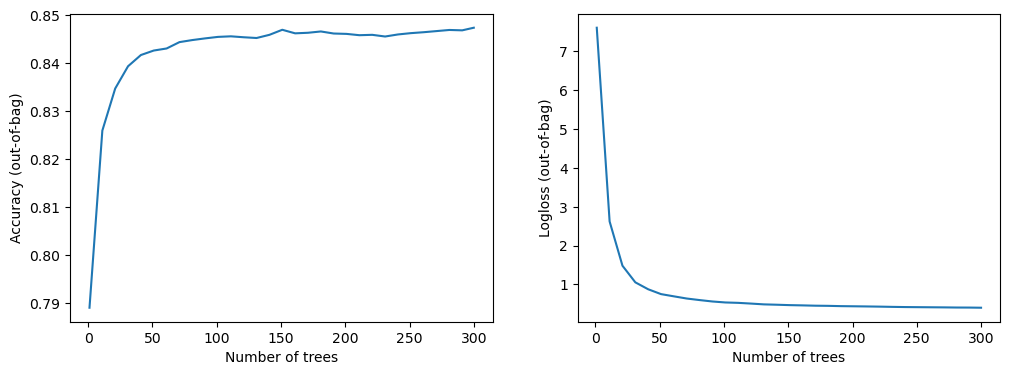

In [106]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# Predictions

In [129]:
scores = model.predict(predictions)

NameError: name 'predictions' is not defined

In [ ]:
scores[0]